# Homework 9 - Nina Braunmiller k11923286 - 06.12.21

## Task 1

### a) Generalized inverse A.T A

In [1]:
#install.packages('MASS')

In [2]:
library(MASS)


In [3]:
A = cbind(c(1,1,1,1,1,1),c(1,1,1,0,0,0),c(0,0,0,1,1,1))


In [4]:
t(A) %*% A


6,3,3
3,3,0
3,0,3


In [5]:
B = ginv(t(A)%*%A, tol=sqrt(.Machine$double.eps))


In [6]:
B


0.07407407,0.03703704,0.03703704
0.03703704,0.18518519,-0.14814815
0.03703704,-0.14814815,0.18518519


### b) $\beta_1 + \beta_2 $

A has rank of 2 but $\beta$ has dimension of 3. However, here we only consider $\beta_1 + \beta_2$. This sum is estimatable. $\beta_i$ for all i are not estimatable. With $\beta_1$ and $\beta_2$ no unique estimation of $y_1$. $P = X \hat{\beta}$ unique.

In [7]:
library(Matrix)


In [8]:
C = matrix(data=c(1,1,0), nrow=1, byrow=T)


In [9]:
OLS = C %*% B %*% t(A)
OLS # estimated coefficients for data vector y.


0.3333333,0.3333333,0.3333333,4.163336e-17,4.163336e-17,4.163336e-17



When estimating y with $\beta_1 + \beta_2$ we get this coefficent-$\hat{y}$-vector. As you can see for the first three entries we get the same values because the first three rows in the given matrix A are the same, they get the same weight. 
Same counts for the last three rows of A and the coefficent-$\hat{y}$-vector entries which are rounded to 0. That makes sense because we have: $1 \cdot \beta_1 + 0 \cdot \beta_2 = \hat{y}_{4/5/6}$. We need to ignore $\beta_3$ here because it is not considered in $\beta_1 + \beta_2$. Therefore, $\beta_1$ can't be estimated alone because the A matrix has rank 2 and the $\beta_2$ gets weight 0 here. It follows that,  $y_{4/5/6}$ get weight of 0 here.


The precision error lies around $10^{-17}$, because we cannot estimate $y_{4/5/6}$ but get 4.163336e-17 instead of 4.

In [10]:
var = C %*% B %*% t(C)
var


0.3333333


Its variance is unique as noted in the lecture. 

### c)  $\beta_1 + \beta_3 $

In [11]:
C2 = matrix(data=c(1,0,1), nrow=1, byrow=T)


In [12]:
OLS = C2 %*% B %*% t(A)
OLS # estimated coefficients for data vector y.


5.551115e-17,5.551115e-17,5.551115e-17,0.3333333,0.3333333,0.3333333


Same interpretation and explanation as in b) but here reversed order because A[row=4/5/6] = [1,0,1] such that $\beta_1$ and $ \beta_3$ are considered and $\beta_2$ ignored. Because all the latter described rows of A are the same, the coefficients for y have all the same weights. A[row=1/2/3] can't be estimated by the current parameter sum. Therefore, here we observe a weight of 0 for the y-entries. 

In [13]:
var = C2 %*% B %*% t(C2)
var


0.3333333


## Task 2 

### Construct three singular matrices

In [14]:
set.seed(11)
singular_matrix <- function(rank)
    {
    singular <- matrix(sample(0:100,(rank+1)*(rank), replace=TRUE),nrow=(rank+1) )
    # use the fact that every non-squared matrix is singular.

    # check the rank of the matrix:
    if(rankMatrix(singular)<rank)
        {
        while(rankMatrix(singular)<rank)
            {
            slicer <- rank
            if (dim(singular_added)[1]<rank) # rank problem lies in rows
                {slicer <- slicer +1}
            
            
            adding1 <- singular[0:slicer] # the 0 is exclusive and isn't considered. The index 1/first element
            # will be considered
            adding2 <- singular[(rank+1):2*slicer]
            adding <- adding1 - adding2
            
            if (dim(singlar_added)[1]<rank) # we append singular at the rows
                {singular <- rbind(singular, adding)}
            
            else{singluar <- cbind(singular, adding)} # append singular at columns

           
            }
        
        }
    print(paste('The final rank of the matirx is', rankMatrix(singular), 'and should be', rank))
    return(singular)
    }


In [15]:
mat4 <- singular_matrix(4)
mat4


[1] "The final rank of the matirx is 4 and should be 4"


33,59,93,38
55,11,93,44
24,84,84,33
15,85,34,48
36,61,92,94


In [16]:
mat5 <- singular_matrix(5)
mat5


[1] "The final rank of the matirx is 5 and should be 5"


39,81,79,39,80
46,11,89,70,4
38,92,10,7,27
5,97,97,24,81
66,2,72,59,36
98,9,59,6,83


In [17]:
mat20 <- singular_matrix(20)
mat20


[1] "The final rank of the matirx is 20 and should be 20"


26,30,17,38,36,5,12,88,33,37,8,23,33,1,14,11,69,15,85,22
16,51,2,3,17,73,11,57,13,60,31,50,52,99,49,8,1,26,85,50
85,58,87,28,95,81,60,39,73,56,92,84,67,42,74,95,35,6,71,18
75,15,36,67,24,35,10,11,81,38,75,43,97,69,64,30,79,0,86,12
45,61,70,87,86,41,64,72,4,51,7,35,57,37,69,45,29,70,24,19
28,46,44,95,93,4,75,16,92,58,10,56,15,19,99,3,82,22,5,6
49,2,16,54,85,76,8,18,36,57,17,28,46,28,0,41,1,68,3,94
38,67,7,87,40,69,15,99,13,58,5,89,100,87,63,97,38,25,1,12
32,70,40,5,58,58,51,95,48,49,46,14,20,100,54,13,18,89,15,94
27,27,38,57,66,7,41,50,42,78,62,77,88,95,72,74,62,57,96,17
90,2,12,8,35,15,79,11,39,8,50,75,53,40,5,79,1,62,23,28


### Checking properties:

In [18]:
testing_statements <- function(input_matrix)
    {
    # Getting the Moore-Penrose g-inverse:
    g_inverse <- ginv(input_matrix, tol=sqrt(.Machine$double.eps))
    
    # P1: AGA = A
    P1 <- all.equal(input_matrix %*% g_inverse %*% input_matrix, input_matrix) #== g_inverse
    # Matrix comparison:
    # identical() doesn't work because matrices are not exactly equal (per identical) 
    # because of very small differences.
    # However, these differences are smaller than the default tolerance inside all.equal()
    # with .Machine$double.eps ^ 0.5.
    # Therefore, use all.equal()
    print(paste('Current rank is', rankMatrix(input_matrix)))
    print(paste('To show P1: AGA = A, which is', P1))
    
    # P2: GAG = G
    P2 <- all.equal(g_inverse %*% input_matrix %*%  g_inverse ,  g_inverse)
    print(paste('To show P2: GAG = G, which is', P2))
    
    # P3: t(AG) == AG
    P3 <- all.equal(t(input_matrix %*% g_inverse), input_matrix %*% g_inverse)
    print(paste('To show P3: t(AG) = AG, which is', P3))
    
    # P4: t(GA) = GA
    P4 <- all.equal(t(g_inverse %*% input_matrix), g_inverse %*% input_matrix)
    print(paste('To show P4: t(GA) = GA, which is', P4))
    
    }


In [19]:
testing_statements(mat4)


[1] "Current rank is 4"
[1] "To show P1: AGA = A, which is TRUE"
[1] "To show P2: GAG = G, which is TRUE"
[1] "To show P3: t(AG) = AG, which is TRUE"
[1] "To show P4: t(GA) = GA, which is TRUE"


In [20]:
testing_statements(mat5)


[1] "Current rank is 5"
[1] "To show P1: AGA = A, which is TRUE"
[1] "To show P2: GAG = G, which is TRUE"
[1] "To show P3: t(AG) = AG, which is TRUE"
[1] "To show P4: t(GA) = GA, which is TRUE"


In [21]:
testing_statements(mat20)


[1] "Current rank is 20"
[1] "To show P1: AGA = A, which is TRUE"
[1] "To show P2: GAG = G, which is TRUE"
[1] "To show P3: t(AG) = AG, which is TRUE"
[1] "To show P4: t(GA) = GA, which is TRUE"


### Interpretation of P3 and P4

Taking $A  A^{-1} = IdentityMatrix = A^{-1}  A$. Here we have no clean inverse because the matrices are singular. However, we could round the result to end up with  identical matrices, e.g.:

In [22]:
print('AG=')
ginv(mat4, tol=sqrt(.Machine$double.eps)) %*% mat4


[1] "AG="


1.000000e+00,1.332268e-15,0.000000e+00,1.332268e-15
0.000000e+00,1.000000e+00,5.551115e-16,5.551115e-16
-1.665335e-16,-7.771561e-16,1.000000e+00,-5.551115e-16
1.110223e-16,-2.220446e-16,-2.220446e-16,1.000000e+00


In [23]:
print('AG transposed=')
t(ginv(mat4, tol=sqrt(.Machine$double.eps)) %*% mat4)


[1] "AG transposed="


1.000000e+00,0.000000e+00,-1.665335e-16,1.110223e-16
1.332268e-15,1.000000e+00,-7.771561e-16,-2.220446e-16
0.000000e+00,5.551115e-16,1.000000e+00,-2.220446e-16
1.332268e-15,5.551115e-16,-5.551115e-16,1.000000e+00


When taking the transpose of a matrix, we end up switching the rows to columns and vice versa. Therefore, we get the same matrix but reflected along the diagonal. When taking the transpose of AG (as given in P3) then we get a mirrored version of AG which should be almost the identity matrix. Because of rounding errors when we take the Moore-Penrose g-inverse G instead of the real inverse $A^{-1}$ (which we can't use here because of singularity of A) we don't end up in identical matrices: $(AG)^T$ not identical with AG. However, we know $A A^{-1} = I$. So with rounding we achieve $(AG)^T = I = AG$ 

Same accounts for P4. $A  A^{-1} = IdentityMatrix = A^{-1}  A$

## Task 3

In [24]:
# Reuse:
prices <- c(1.21,1.2,1.21,1.22,1.23,1.24,1.24,1.26,1.25,1.27,1.28,1.29,1.31,1.32,1.33,1.35,1.36,1.38,1.38,1.38,1.39,1.4,1.4,1.41,1.43,1.42,1.42,1.42,1.43,1.43,1.44,1.45,1.46,1.48,1.48,1.49,1.5,1.5,1.5,1.5,1.5,1.49,1.5,1.5,1.5,1.5,1.6,1.57,1.58,1.59)
prices <- cummax(prices) # take old value when the new value falls
time <- c(1:length(prices))
Y <- lm(prices~time)
Y



Call:
lm(formula = prices ~ time)

Coefficients:
(Intercept)         time  
   1.208767     0.007586  


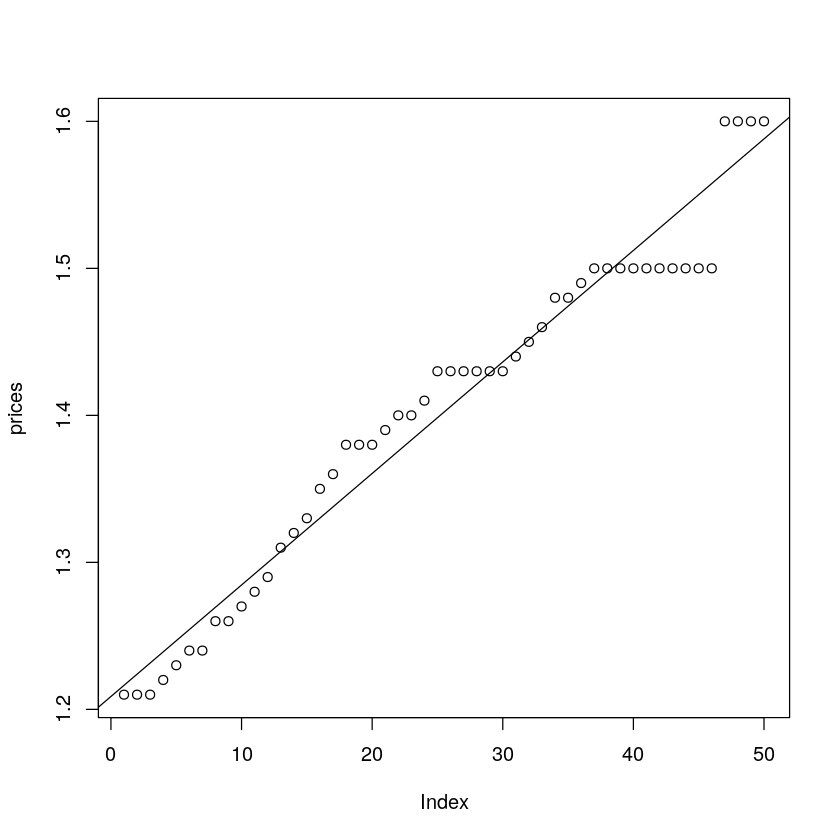

In [25]:
#Reuse:
plot(prices)
abline(Y)


In [26]:
time_interval_length <- length(prices)/2
time_interval_length 


[1] 25

In [27]:
# Create a matrix:
time1 <- matrix(rep(c(1,1,0),time_interval_length), nrow=time_interval_length, byrow=T)
time2 <- matrix(rep(c(1,0,1),time_interval_length), nrow=time_interval_length, byrow=T)
X <- rbind(time1,time2)


In [28]:
rankMatrix(X)


[1] 2
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 1.110223e-14

In [29]:
pseudo_inv <- ginv(X, tol=sqrt(.Machine$double.eps))
a_array <- pseudo_inv %*% prices # prices = y
a_array


0.9348
0.3756
0.5592


Getting variance:

In [30]:
pseudo_inv2 <- ginv(t(X) %*% X, tol=sqrt(.Machine$double.eps))
pseudo_inv2


0.008888889,0.004444444,0.004444444
0.004444444,0.022222222,-0.017777778
0.004444444,-0.017777778,0.022222222


In [31]:
diagonals <- diag(pseudo_inv2)


In [32]:
a0_var <- diagonals[1]
a0_var


[1] 0.008888889

In [33]:
a1_var <- diagonals[2]
a1_var


[1] 0.02222222

In [34]:
a2_var <- diagonals[3]
a2_var


[1] 0.02222222